In [14]:
pip install imbalanced-learn

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn import tree

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.metrics import classification_report, f1_score, confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from keras.models import Sequential
from keras.layers import Dense

from imblearn.over_sampling import SMOTE

from xgboost import plot_tree



In [16]:
data = pd.read_csv("nasa.csv")
data.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219878,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2458161.642,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2457794.969,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2458120.468,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2457902.337,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219878,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2457814.455,135.142133,0.726395,J2000,True


In [17]:
data.shape

(4687, 40)

In [18]:
data.describe()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion
count,4.687000e+03,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,...,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000
mean,3.272298e+06,3.272298e+06,22.267865,0.204604,0.457509,204.604203,457.508906,0.127135,0.284283,671.273653,...,1.400264,13.373844,172.157275,635.582076,0.813383,183.932151,1.987144,2.457728e+06,181.167927,0.738242
std,5.486011e+05,5.486011e+05,2.890972,0.369573,0.826391,369.573402,826.391249,0.229642,0.513496,1212.511199,...,0.524154,10.936227,103.276777,370.954727,0.242059,103.513035,0.951519,9.442264e+02,107.501623,0.342627
min,2.000433e+06,2.000433e+06,11.160000,0.001011,0.002260,1.010543,2.259644,0.000628,0.001404,3.315431,...,0.615920,0.014513,0.001941,176.557161,0.080744,0.006918,0.803765,2.450100e+06,0.003191,0.086285
25%,3.097594e+06,3.097594e+06,20.100000,0.033462,0.074824,33.462237,74.823838,0.020792,0.046493,109.784247,...,1.000635,4.962341,83.081208,365.605031,0.630834,95.625916,1.266059,2.457815e+06,87.006918,0.453289
50%,3.514799e+06,3.514799e+06,21.900000,0.110804,0.247765,110.803882,247.765013,0.068850,0.153954,363.529809,...,1.240981,10.311836,172.625394,504.947292,0.833153,189.761641,1.618195,2.457973e+06,185.718889,0.712946
75%,3.690060e+06,3.690060e+06,24.500000,0.253837,0.567597,253.837029,567.596853,0.157727,0.352688,832.798679,...,1.678364,19.511681,255.026909,794.195972,0.997227,271.777557,2.451171,2.458108e+06,276.531946,0.984669
max,3.781897e+06,3.781897e+06,32.100000,15.579552,34.836938,15579.552410,34836.938250,9.680682,21.646663,51114.018740,...,5.072008,75.406667,359.905890,4172.231343,1.299832,359.993098,8.983852,2.458839e+06,359.917991,2.039000


In [19]:
data.duplicated().sum()

0

In [20]:
data.isnull().sum().any()

False

In [21]:
data = data.fillna(data.select_dtypes(include='number').mean())


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   float64
 13  Rel

<Axes: >

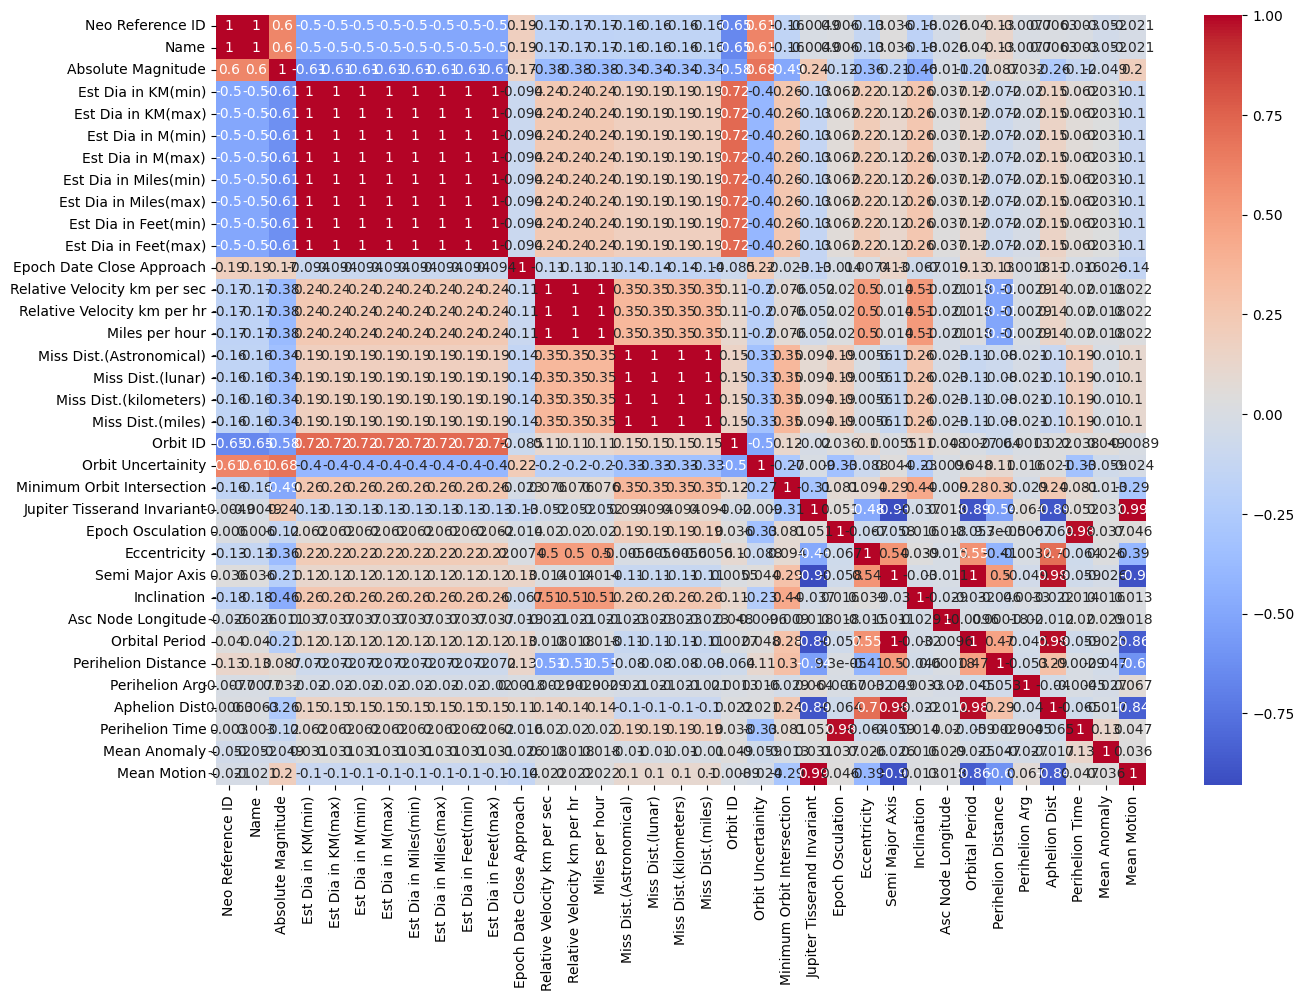

In [23]:
plt.figure(figsize=(15, 10))
numeric_data = data.select_dtypes(include='number')

# Compute the correlation matrix
corr = numeric_data.corr()

#corr=data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

<h2> As you can see in the heatmap above, there is a lot of similar data in the dataset. We have to exclude them.</h2>

In [24]:
data.isna().any()
data.isna().sum()

,0
Neo Reference ID,0
Name,0
Absolute Magnitude,0
Est Dia in KM(min),0
Est Dia in KM(max),0
Est Dia in M(min),0
Est Dia in M(max),0
Est Dia in Miles(min),0
Est Dia in Miles(max),0
Est Dia in Feet(min),0


# Data Preparation

In [25]:
label_encoder = LabelEncoder()
data["Label"] = label_encoder.fit_transform(data["Hazardous"])
data.iloc[:,-2:]


,Hazardous,Label
0,True,1
1,False,0
2,True,1
3,False,0
4,True,1
...,...,...
4682,False,0
4683,False,0
4684,False,0
4685,False,0


In [26]:
data["Label"].value_counts()

,count
Label,
0,3932
1,755


In [27]:
categories = [False,True]


In [28]:
classes = list(set(data["Hazardous"]))
data.drop(["Miss Dist.(Astronomical)","Miss Dist.(lunar)","Miss Dist.(miles)","Relative Velocity km per sec","Est Dia in M(max)","Relative Velocity km per hr","Est Dia in Feet(max)", "Est Dia in Feet(min)", "Est Dia in Miles(max)", "Est Dia in Miles(min)","Est Dia in KM(max)","Est Dia in KM(min)","Neo Reference ID","Orbit ID","Name","Close Approach Date","Equinox","Epoch Date Close Approach","Orbiting Body","Orbit Determination Date","Hazardous"], axis=1, inplace=True)


In [29]:
data.head()

,Absolute Magnitude,Est Dia in M(min),Miles per hour,Miss Dist.(kilometers),Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Label
0,21.6,127.219878,13680.50994,62753692.0,5,0.025282,4.634,2458000.5,0.425549,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2458161.642,264.837533,0.590551,1
1,21.3,146.067964,40519.17311,57298148.0,3,0.186935,5.457,2458000.5,0.351674,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2457794.969,173.741112,0.845330,0
2,20.3,231.502122,16979.66180,7622911.5,0,0.043058,4.557,2458000.5,0.348248,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2458120.468,292.893654,0.559371,1
3,27.4,8.801465,24994.83986,42683616.0,6,0.005512,5.093,2458000.5,0.216578,1.255903,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2457902.337,68.741007,0.700277,0
4,21.6,127.219878,22012.95498,61010824.0,1,0.034798,5.154,2458000.5,0.210448,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2457814.455,135.142133,0.726395,1


<Axes: >

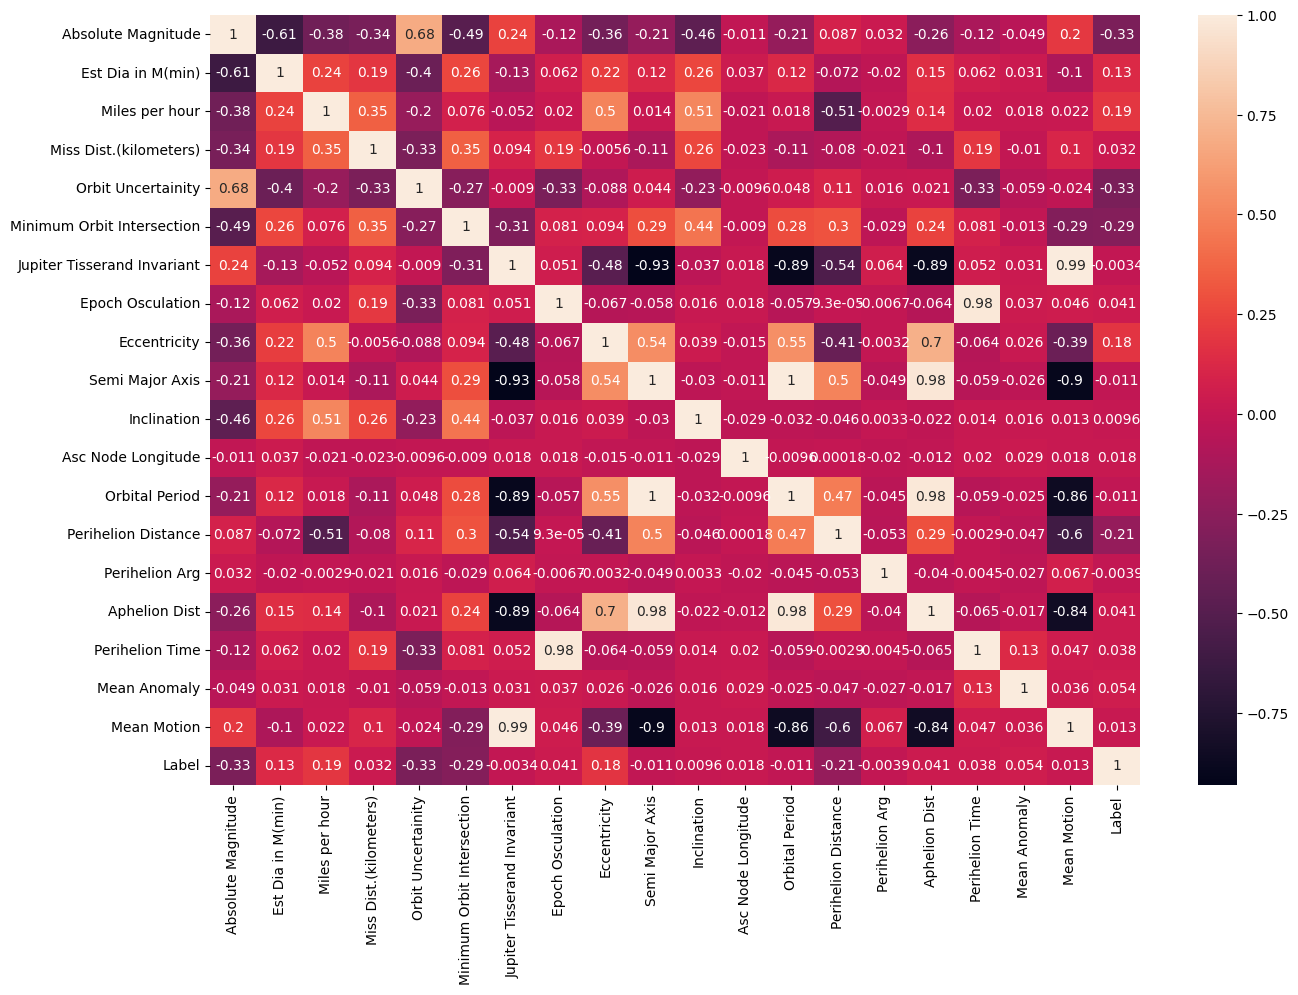

In [30]:
plt.figure(figsize=(15, 10))
corr=data.corr()
sns.heatmap(corr,annot=True)


In [31]:
X, y = data.iloc[: , :-1], data.iloc[: , -1]
#Oversampling
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
print(y.value_counts())

Label
1    3932
0    3932
Name: count, dtype: int64


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y ,random_state=7,test_size=0.3)
print(X_train)


      Absolute Magnitude  Est Dia in M(min)  Miles per hour  \
5136           21.041070         166.812274    20240.128187   
7844           21.277879         147.590796    39754.662712   
2107           15.380000        2231.284644    26341.972660   
3585           23.700000          48.367649    23727.144650   
3263           22.200000          96.506147    41507.119830   
...                  ...                ...             ...   
7816           18.992122         429.843932    86254.593425   
6377           20.353317         247.555523    27907.994260   
5002           19.606789         340.147300    23597.237171   
3486           29.400000           3.503926    41881.979520   
4973           19.110774         405.397618    77246.601093   

      Miss Dist.(kilometers)  Orbit Uncertainity  Minimum Orbit Intersection  \
5136            8.813737e+06                   0                    0.026029   
7844            1.054136e+07                   0                    0.021993   
210

In [33]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
print(X_train)
X_test = scaler.transform(X_test)


[[-0.14385615 -0.23920601 -0.86239012 ...  0.31944537  1.49068111
   0.67099117]
 [-0.05150054 -0.29583955  0.34623585 ...  0.48047757  0.3574477
   0.52301457]
 [-2.35167478  5.84348837 -0.48447449 ...  0.59637757  0.1748247
  -0.44392744]
 ...
 [-0.7032261   0.27150269 -0.65446873 ...  0.5399438   0.22978147
   0.00927251]
 [ 3.11612899 -0.72037242  0.47799048 ...  0.45046173 -0.03617642
   1.62587912]
 [-0.89667194  0.46375411  2.66828611 ...  0.01964502 -1.14659384
  -0.7169239 ]]


# Naive Bayes

In [34]:
nb_model = GaussianNB().fit(X_train,y_train)

print("Accuracy of train:",nb_model.score(X_train,y_train))

print("Accuracy of test:",nb_model.score(X_test,y_test))

Accuracy of train: 0.9471293604651163
Accuracy of test: 0.9415254237288135


In [35]:
#predictions
nb_model_preds = nb_model.predict(X_test)
print(classification_report(y_test,nb_model_preds))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1180
           1       0.94      0.94      0.94      1180

    accuracy                           0.94      2360
   macro avg       0.94      0.94      0.94      2360
weighted avg       0.94      0.94      0.94      2360



In [36]:
# Metrics
print("Precision = {}".format(precision_score(y_test, nb_model_preds, average='macro')))
print("Recall = {}".format(recall_score(y_test, nb_model_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, nb_model_preds)))
print("F1 Score = {}".format(f1_score(y_test, nb_model_preds,average='macro')))

Precision = 0.9415457188494731
Recall = 0.9415254237288135
Accuracy = 0.9415254237288135
F1 Score = 0.941524751792609


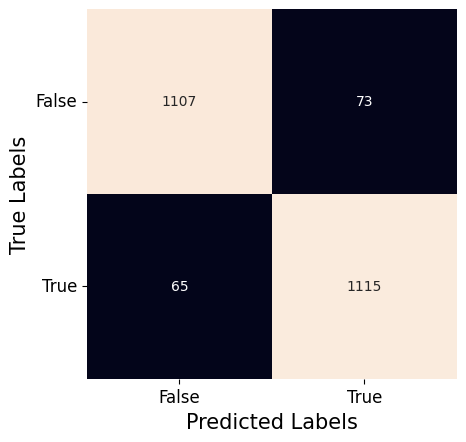

In [37]:
cm = confusion_matrix(y_test, nb_model_preds)
ax =sns.heatmap(cm, square=True, annot=True, cbar=False, fmt='g')
ax.xaxis.set_ticklabels(categories, fontsize = 12)
ax.yaxis.set_ticklabels(categories, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

# Logistic Regression

In [38]:
log_reg_model = LogisticRegression().fit(X_train, y_train)
print("Accuracy of train:",log_reg_model.score(X_train,y_train))
print("Accuracy of test:",log_reg_model.score(X_test,y_test))

Accuracy of train: 0.9585755813953488
Accuracy of test: 0.9478813559322034


In [39]:
#predictions
log_reg_preds = log_reg_model.predict(X_test)
print(classification_report(y_test,log_reg_preds))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95      1180
           1       0.93      0.97      0.95      1180

    accuracy                           0.95      2360
   macro avg       0.95      0.95      0.95      2360
weighted avg       0.95      0.95      0.95      2360



In [40]:
# Metrics
print("Precision = {}".format(precision_score(y_test, log_reg_preds, average='macro')))
print("Recall = {}".format(recall_score(y_test, log_reg_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, log_reg_preds)))
print("F1 Score = {}".format(f1_score(y_test, log_reg_preds,average='macro')))

Precision = 0.9484768987257569
Recall = 0.9478813559322035
Accuracy = 0.9478813559322034
F1 Score = 0.9478640477995514


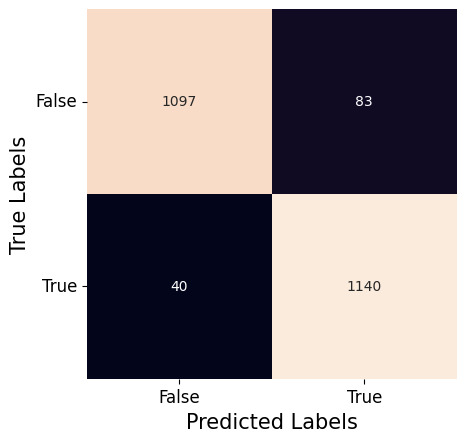

In [41]:
cm = confusion_matrix(y_test, log_reg_preds)
ax =sns.heatmap(cm, square=True, annot=True, cbar=False, fmt='g')
ax.xaxis.set_ticklabels(categories, fontsize = 12)
ax.yaxis.set_ticklabels(categories, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

# Random Forest

In [42]:
rf_model = RandomForestClassifier().fit(X_train, y_train)
print("Accuracy of train:",rf_model.score(X_train,y_train))
print("Accuracy of test:",rf_model.score(X_test,y_test))

Accuracy of train: 1.0
Accuracy of test: 0.9983050847457627


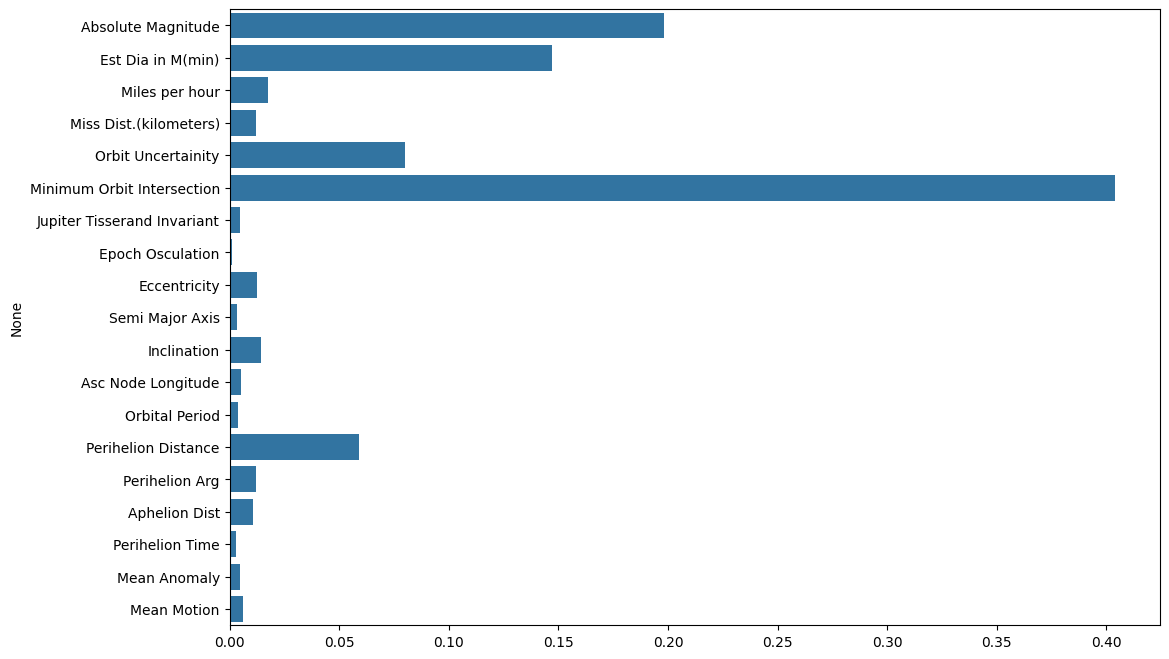

In [43]:
#Feature Importance
plt.figure(figsize=(12, 8))
sns.barplot(x=rf_model.feature_importances_, y=X.columns)
plt.show()

In [44]:
#predictions
rf_model_preds = rf_model.predict(X_test)
print(classification_report(y_test,rf_model_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1180
           1       1.00      1.00      1.00      1180

    accuracy                           1.00      2360
   macro avg       1.00      1.00      1.00      2360
weighted avg       1.00      1.00      1.00      2360



In [45]:
# Metrics
print("Precision = {}".format(precision_score(y_test, rf_model_preds, average='macro')))
print("Recall = {}".format(recall_score(y_test, rf_model_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, rf_model_preds)))
print("F1 Score = {}".format(f1_score(y_test, rf_model_preds,average='macro')))

Precision = 0.9983050847457627
Recall = 0.9983050847457627
Accuracy = 0.9983050847457627
F1 Score = 0.9983050847457627


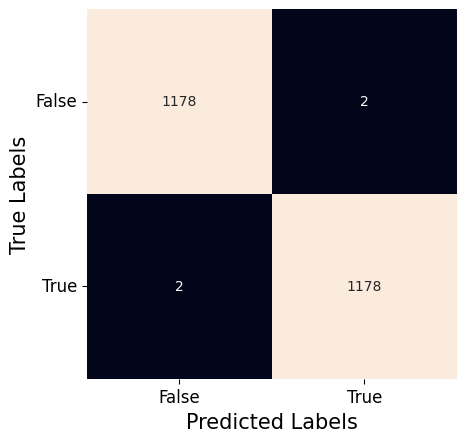

In [46]:
cm = confusion_matrix(y_test, rf_model_preds)
ax =sns.heatmap(cm, square=True, annot=True, cbar=False, fmt='g')
ax.xaxis.set_ticklabels(categories, fontsize = 12)
ax.yaxis.set_ticklabels(categories, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

# Decision Tree

In [47]:
dec_tree = DecisionTreeClassifier().fit(X_train,y_train)
print("Accuracy of train:",dec_tree.score(X_train,y_train))
print("Accuracy of test:",dec_tree.score(X_test,y_test))

Accuracy of train: 1.0
Accuracy of test: 0.9961864406779661


In [48]:
#plt.figure(figsize=(15, 10))
#tree.plot_tree(dec_tree)

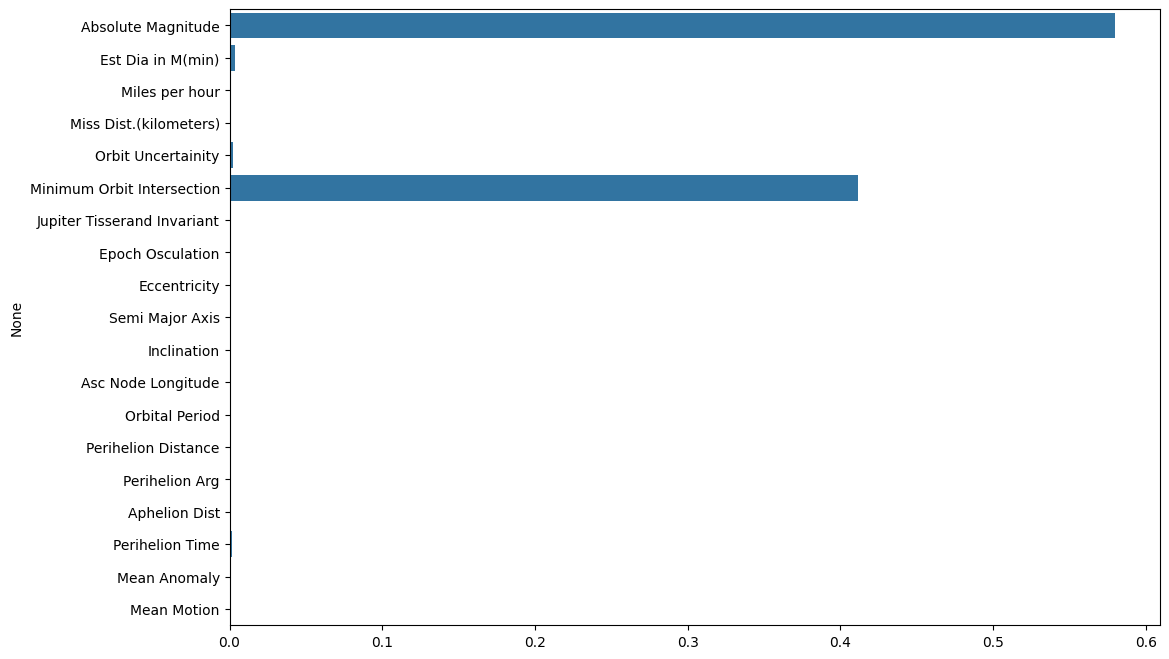

In [49]:
#Feature Importance
plt.figure(figsize=(12, 8))
sns.barplot(x=dec_tree.feature_importances_, y=X.columns)
plt.show()

In [50]:
#predictions
dec_tree_preds = dec_tree.predict(X_test)
print(classification_report(y_test,dec_tree_preds))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1180
           1       0.99      1.00      1.00      1180

    accuracy                           1.00      2360
   macro avg       1.00      1.00      1.00      2360
weighted avg       1.00      1.00      1.00      2360



In [51]:
# Metrics
print("Precision = {}".format(precision_score(y_test, dec_tree_preds, average='macro')))
print("Recall = {}".format(recall_score(y_test, dec_tree_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, dec_tree_preds)))
print("F1 Score = {}".format(f1_score(y_test, dec_tree_preds,average='macro')))

Precision = 0.9961953496723225
Recall = 0.9961864406779661
Accuracy = 0.9961864406779661
F1 Score = 0.996186423560146


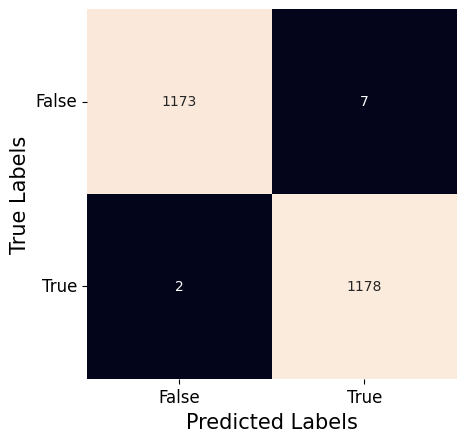

In [52]:
cm = confusion_matrix(y_test, dec_tree_preds)
ax =sns.heatmap(cm, square=True, annot=True, cbar=False, fmt='g')
ax.xaxis.set_ticklabels(categories, fontsize = 12)
ax.yaxis.set_ticklabels(categories, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

# KNN

In [53]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)
print("Accuracy of train:",knn.score(X_train,y_train))
print("Accuracy of test:",knn.score(X_test,y_test))

Accuracy of train: 0.9198764534883721
Accuracy of test: 0.9012711864406779


In [54]:
#predictions
Knn_preds = knn.predict(X_test)
print(classification_report(y_test,Knn_preds))

              precision    recall  f1-score   support

           0       0.98      0.82      0.89      1180
           1       0.84      0.98      0.91      1180

    accuracy                           0.90      2360
   macro avg       0.91      0.90      0.90      2360
weighted avg       0.91      0.90      0.90      2360



In [55]:
# Metrics
print("Precision = {}".format(precision_score(y_test, Knn_preds, average='macro')))
print("Recall = {}".format(recall_score(y_test, Knn_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, Knn_preds)))
print("F1 Score = {}".format(f1_score(y_test, Knn_preds,average='macro')))

Precision = 0.9125371481310567
Recall = 0.9012711864406779
Accuracy = 0.9012711864406779
F1 Score = 0.9005925075588779


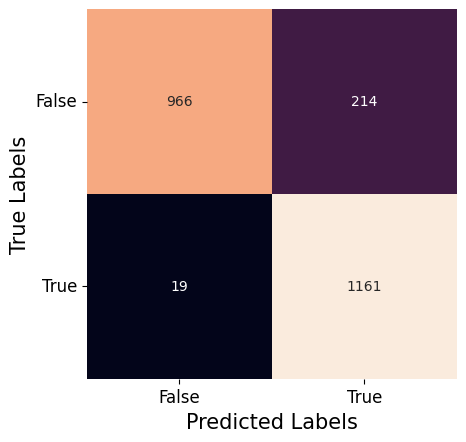

In [56]:
cm = confusion_matrix(y_test, Knn_preds)
ax =sns.heatmap(cm, square=True, annot=True, cbar=False, fmt='g')
ax.xaxis.set_ticklabels(categories, fontsize = 12)
ax.yaxis.set_ticklabels(categories, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

# SVM

In [57]:
svm = SVC(random_state=2)
svm.fit(X_train, y_train)
print("Accuracy of train:",svm.score(X_train,y_train))
print("Accuracy of test:",svm.score(X_test,y_test))

Accuracy of train: 0.9783793604651163
Accuracy of test: 0.9656779661016949


In [58]:
#predictions
svm_preds = svm.predict(X_test)
print(classification_report(y_test,svm_preds))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96      1180
           1       0.94      0.99      0.97      1180

    accuracy                           0.97      2360
   macro avg       0.97      0.97      0.97      2360
weighted avg       0.97      0.97      0.97      2360



In [59]:
# Metrics
print("Precision = {}".format(precision_score(y_test, svm_preds, average='macro')))
print("Recall = {}".format(recall_score(y_test, svm_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, svm_preds)))
print("F1 Score = {}".format(f1_score(y_test, svm_preds,average='macro')))

Precision = 0.9668450787986916
Recall = 0.965677966101695
Accuracy = 0.9656779661016949
F1 Score = 0.9656565014150793


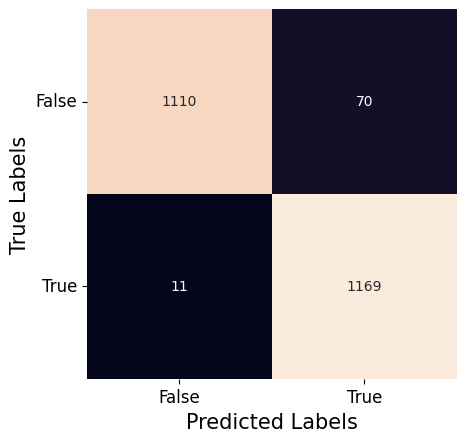

In [60]:
cm = confusion_matrix(y_test, svm_preds)
ax =sns.heatmap(cm, square=True, annot=True, cbar=False, fmt='g')
ax.xaxis.set_ticklabels(categories, fontsize = 12)
ax.yaxis.set_ticklabels(categories, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

In [61]:
input=X_train.shape[1]
input

19

# Deep Learning

In [62]:
dl_model = Sequential()
input=X_train.shape[1]
dl_model.add(Dense(12, activation='relu', input_shape=(input,)))
dl_model.add(Dense(8, activation='relu'))
dl_model.add(Dense(5, activation='relu'))
dl_model.add(Dense(3, activation='relu'))
dl_model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [63]:
dl_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 12)                  │             240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 5)                   │              45 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │              18 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 411 (1.61 KB)

 Trainable params: 411 (1.61 KB)

 Non-trainable params: 0 (0.00 B)

In [64]:
dl_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [65]:
dl_model_history=dl_model.fit(X_train,y_train, epochs=100, batch_size=100, validation_data=(X_test,y_test))

Epoch 1/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.4834 - loss: 0.7013 - val_accuracy: 0.6356 - val_loss: 0.6642
Epoch 2/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6647 - loss: 0.6408 - val_accuracy: 0.6915 - val_loss: 0.5718
Epoch 3/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7725 - loss: 0.5259 - val_accuracy: 0.8339 - val_loss: 0.4630
Epoch 4/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8824 - loss: 0.4333 - val_accuracy: 0.8924 - val_loss: 0.4047
Epoch 5/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9049 - loss: 0.3852 - val_accuracy: 0.9271 - val_loss: 0.3658
Epoch 6/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9366 - loss: 0.3492 - val_accuracy: 0.9407 - val_loss: 0.3374
Epoch 7/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9441 - loss: 0.3279 - val_accuracy: 0.9483 - val_loss: 0.3170
Epoch 8/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9587 - loss: 0.3041 - val_accuracy: 0.9521 - v

Text(0, 0.5, 'Accuracy')

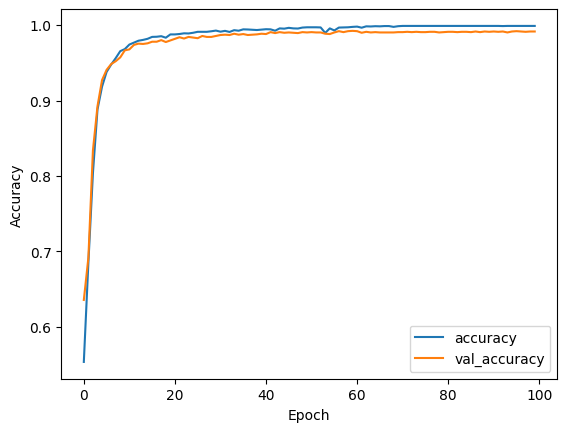

In [66]:
plt.plot(dl_model_history.history['accuracy'])
plt.plot(dl_model_history.history['val_accuracy'])
plt.legend(["accuracy","val_accuracy"])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

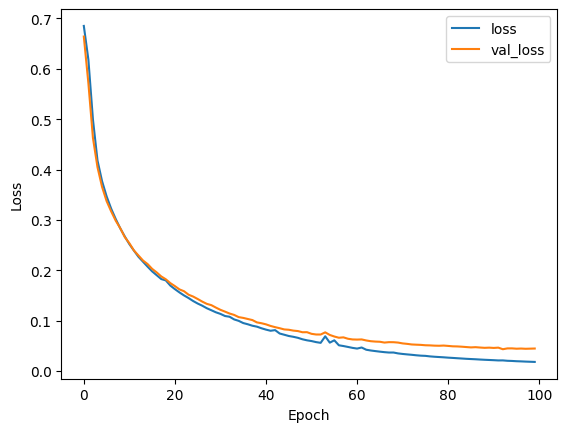

In [67]:
plt.plot(dl_model_history.history['loss'])
plt.plot(dl_model_history.history['val_loss'])
plt.legend(["loss","val_loss"])
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [68]:
#predictions
dl_model_preds = dl_model.predict(X_test)
print(classification_report(y_test,dl_model_preds.round()))

74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1180
           1       0.99      0.99      0.99      1180

    accuracy                           0.99      2360
   macro avg       0.99      0.99      0.99      2360
weighted avg       0.99      0.99      0.99      2360



In [69]:
# Metrics
print("Precision = {}".format(precision_score(y_test, dl_model_preds.round(), average='macro')))
print("Recall = {}".format(recall_score(y_test, dl_model_preds.round(), average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, dl_model_preds.round())))
print("F1 Score = {}".format(f1_score(y_test, dl_model_preds.round(),average='macro')))

Precision = 0.9915310718882148
Recall = 0.9915254237288136
Accuracy = 0.9915254237288136
F1 Score = 0.9915253993835087


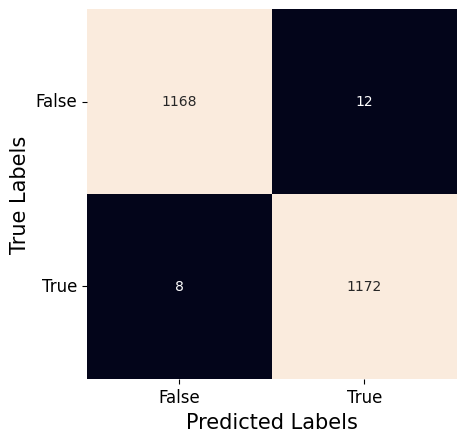

In [70]:
cm = confusion_matrix(y_test, dl_model_preds.round())
ax =sns.heatmap(cm, square=True, annot=True, cbar=False, fmt='g')
ax.xaxis.set_ticklabels(categories, fontsize = 12)
ax.yaxis.set_ticklabels(categories, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

In [71]:
accuracies={}
acc_n=accuracy_score(y_test, nb_model_preds)
accuracies['Naive Bayes'] = acc_n*100
acc_l=accuracy_score(y_test, log_reg_preds)
accuracies['Logistic Regression'] = acc_l*100
acc_r=accuracy_score(y_test, rf_model_preds)
accuracies['Random Forest'] = acc_r*100
acc_dt=accuracy_score(y_test, dec_tree_preds)
accuracies['Decision Tree'] = acc_dt*100
acc_knn=accuracy_score(y_test, Knn_preds)
accuracies['KNN'] = acc_knn*100
acc_svm=accuracy_score(y_test, svm_preds)
accuracies['SVM'] = acc_svm*100
acc_d=accuracy_score(y_test, dl_model_preds.round())
accuracies['Deep Learning'] = acc_d*100

In [72]:
#All Accuracies
Accuracies = pd.Series([acc_n, acc_l, acc_r, acc_dt, acc_knn, acc_svm,acc_d],
                        index=['Naive_Bayes_accuracy','Logistic_Regression_accuracy', 'Random_Forest_accuracy', 'Decision_Tree_accuracy', 'KNN_accuracy', 'SVM_accuracy', 'Deep_Learning_accuracy'])
Accuracies

,0
Naive_Bayes_accuracy,0.941525
Logistic_Regression_accuracy,0.947881
Random_Forest_accuracy,0.998305
Decision_Tree_accuracy,0.996186
KNN_accuracy,0.901271
SVM_accuracy,0.965678
Deep_Learning_accuracy,0.991525


<ipython-input-73-3541f9462928>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors )


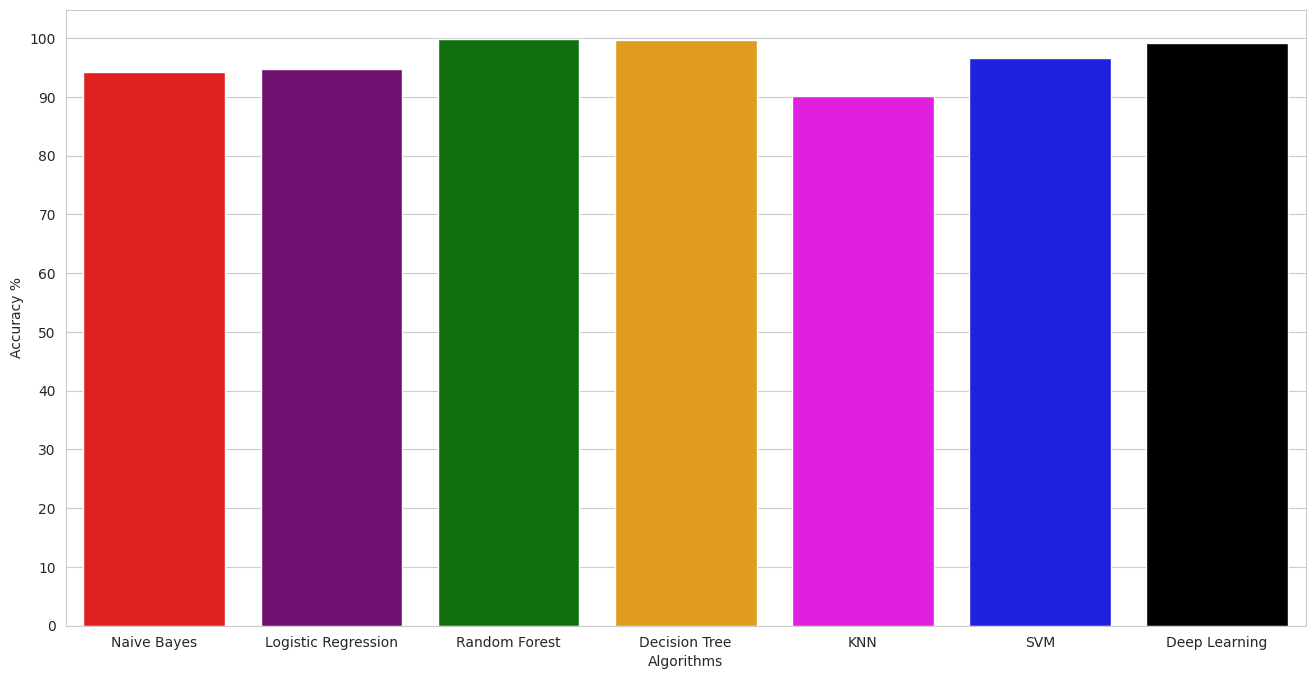

In [73]:
#Comparing Accuracies
colors = ["red","purple", "green", "orange", "magenta","blue","black"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,8))
plt.yticks(np.arange(0,1200,10))
plt.ylabel("Accuracy %")#percent so multiply by 100
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors )
plt.show()

In [74]:
len(X_test[2])

19